# Neural Networks and Deep Learning for Life Sciences and Health Applications - An introductory course about theoretical fundamentals, case studies and implementations in python and tensorflow 

(C) Umberto Michelucci 2018 - umberto.michelucci@gmail.com 

github repository: https://github.com/michelucci/zhaw-dlcourse-spring2019

Spring Semester 2019

# Calculus and the optimisation problem

## Learning Goals

- Understand the concept of a derivative
- Understand the concept of a derivative as a limit
- Understand how to approximate a derivative
- Understand the main idea of numerical optimisation
- Understand Nelder-Mead method and gradient descent
- Understand the quirks of the learning rate

## Library import

In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
# Reference: https://matplotlib.org/users/usetex.html

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# A function and its derivative

Given a function  $f(x)$ of one dimensional argument $x$ its derivative is indicated with the notation

$$
\frac{df(x)}{dx}
$$

and it measures how steep a function is at a certain point, or how fast it changes at that point. For example given the function 

$$
f(x) = x^2
$$

its derivative is given by

$$
\frac{df(x)}{dx} = 2x
$$

Reference: https://en.wikipedia.org/wiki/Derivative

The derivative can be approximated by the following formula

$$
\frac{f(x_0+h)-f(x_0)}{h}
$$

the approximation is better for smaller values of $h$. If you know what a limit is, the exact value for the derivative can be written as

$$
\frac{df(x_0)}{dx} = \lim_{h\rightarrow 0} \frac{f(x_0+h)-f(x_0)}{h}
$$

Let's consider our function $f(x)$ and let's plot the tangent to the function $f(x)$ at $x=2$ for various values of $h$.

In [4]:
def f(x):
    return x**2

In [5]:
x = np.arange(-5,8,0.1)

The derivative of $x^2$ is $2x$. So at $x=2$ the derivative assumes the value of $df(x=2)/dx=4$

In [9]:
h = 4
der1 = (f(2+h)-f(2))/h

h = 2
der2 = (f(2+h)-f(2))/h

h = 0.01
der3 = (f(2+h)-f(2))/h

In [10]:
f(2)

4

In [11]:
print(der1)
print(der2)
print(der3)

8.0
6.0
4.009999999999891


as you can see for $h=0.01$ you get quite a good approximation, considering that the right value should be $4$.

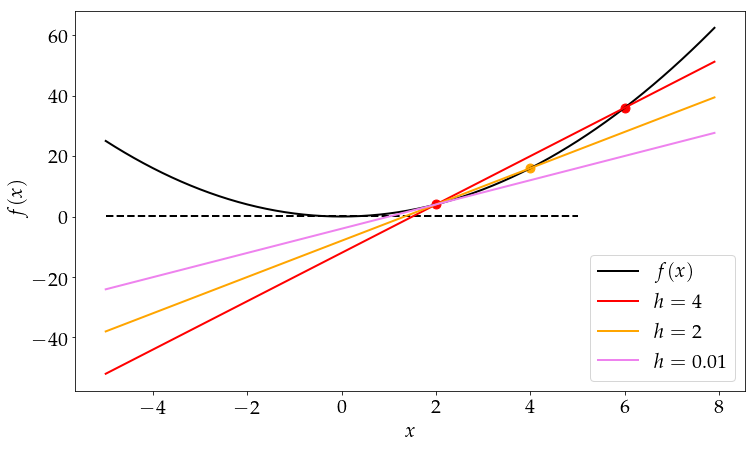

In [97]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1, 1, 1)

plt.plot(x,f(x), color = 'black', alpha = 1, linewidth = 2, label = '$f(x)$')
plt.plot(x, der1*(x-2)+f(2), color = 'red', linewidth = 2,label = '$h=4$')
plt.plot(x, der2*(x-2)+f(2), color = 'orange', linewidth = 2,label = '$h=2$')
plt.plot(x, der3*(x-2)+f(2), color = 'violet', linewidth = 2,label = '$h=0.01$')
plt.scatter(2,4, s = 80, color = 'red')
plt.scatter(6,36, s = 80, color = 'red')
plt.scatter(4,16, s = 80, color = 'orange')
plt.hlines(y=0.2, xmin=-5, xmax=5, linewidth=2, color='black', linestyles= 'dashed')
ax.set_xlabel('$x$', fontsize = 20)
ax.set_ylabel('$f(x)$', fontsize = 20)
plt.legend(fontsize = 20)
plt.tick_params(labelsize=20)

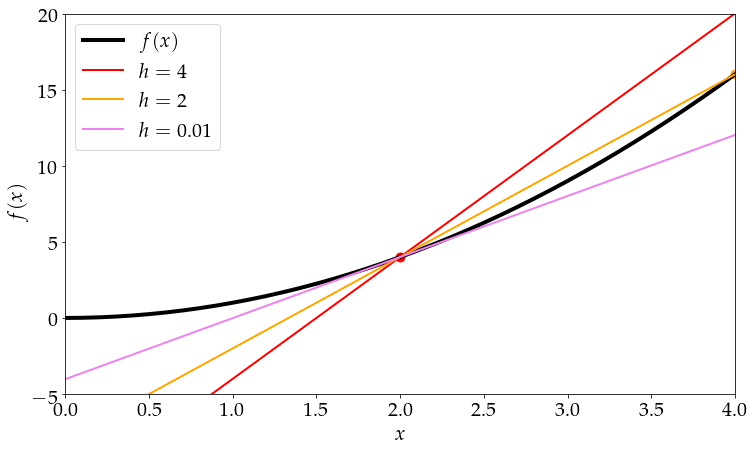

In [103]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1, 1, 1)

plt.plot(x,f(x), color = 'black', alpha = 1, linewidth = 4, label = '$f(x)$')
plt.plot(x, der1*(x-2)+f(2), color = 'red', linewidth = 2,label = '$h=4$')
plt.plot(x, der2*(x-2)+f(2), color = 'orange', linewidth = 2,label = '$h=2$')
plt.plot(x, der3*(x-2)+f(2), color = 'violet', linewidth = 2,label = '$h=0.01$')
plt.scatter(2,4, s = 80, color = 'red')
plt.scatter(6,36, s = 80, color = 'red')
plt.scatter(4,16, s = 80, color = 'orange')
#plt.hlines(y=0.2, xmin=-2, xmax=4, linewidth=2, color='black', linestyles= 'dashed')
ax.set_xlabel('$x$', fontsize = 20)
ax.set_ylabel('$f(x)$', fontsize = 20)
plt.xlim(0,4)
plt.ylim(-5,20)
plt.legend(fontsize = 20)
plt.tick_params(labelsize=20)

## Plot of the tangent of $f(x)$ at differente locations

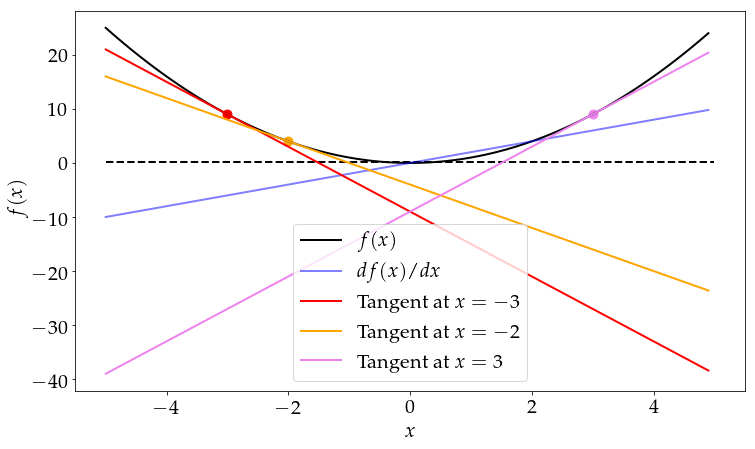

In [73]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1, 1, 1)

plt.plot(x,f(x), color = 'black', alpha = 1, linewidth = 2, label = '$f(x)$')
plt.plot(x, 2*x, color = 'blue', alpha = 0.5, linewidth = 2, label = '$df(x)/dx$')
plt.plot(x, -6*x-9, color = 'red', linewidth = 2,label = 'Tangent at $x=-3$')
plt.plot(x, -4*x-4, color = 'orange', linewidth = 2,label = 'Tangent at $x=-2$')
plt.plot(x, 6*x-9, color = 'violet', linewidth = 2,label = 'Tangent at $x=3$')
plt.scatter(-3,9, s = 80, color = 'red')
plt.scatter(-2,4, s = 80, color = 'orange')
plt.scatter(3,9, s = 80, color = 'violet')
plt.hlines(y=0.2, xmin=-5, xmax=5, linewidth=2, color='black', linestyles= 'dashed')
ax.set_xlabel('$x$', fontsize = 20)
ax.set_ylabel('$f(x)$', fontsize = 20)
plt.legend(fontsize = 20)
plt.tick_params(labelsize=20)

# Beatiful Interactive demonstraion of the problem of finding the minimum of a function

# Nelder-Mead Method

The Nelder–Mead method or downhill simplex method or amoeba method is a commonly applied numerical method used to find the minimum or maximum of an objective function in a multidimensional space. It is applied to nonlinear optimization problems for which derivatives may not be known. However, the Nelder–Mead technique is a heuristic search method that can converge to non-stationary points on problems that can be solved by alternative methods. (Wikipedia)

The Nelder–Mead technique was proposed by John Nelder and Roger Mead (1965).

Let's consider the following function

In [17]:
def f(x):
    result = np.log(1+np.power(np.abs(x),2+np.sin(x)))
    return (result)

In [79]:
xaxis = np.arange(-10, 10,0.2)

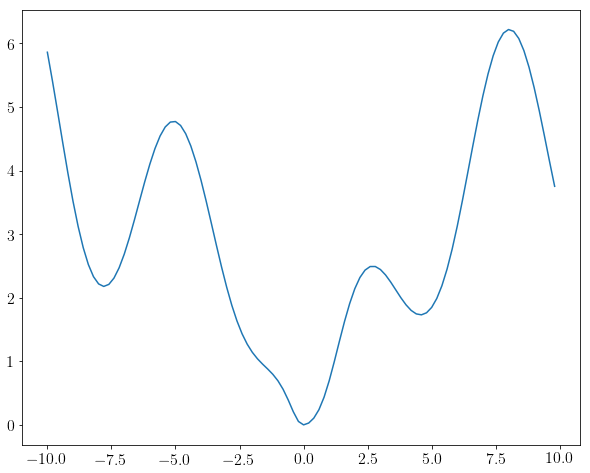

In [80]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

fig = plt.figure(figsize=(10,8))

plt.plot(xaxis, f(xaxis))
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

## Algorithm Description in $n$-dimensions

The algorithm for a function $F({\bf x})$ works in this way in $n$ dimensions.

1.
We start with $n+1$ points in the $n$-dimensional space (for one dimension $n=1$)

$$
{\bf x}_1,{\bf x}_2,..., {\bf x}_{n+1}
$$

The point are sorted such that, defining $F_j = F({\bf x}_j)$

$$
F_1 \leq F_2 \leq ... \leq F_{n+1}
$$

and we define the "center of gravity" of the points ${\bf c}$ as

$$
c=\frac{1}{n} \sum_{j=1}^n {\bf x}_j
$$

2. We repeat the following procedure

At the start we generate a new candidate point ${\bf x}_r$ obtained by reflexion of worst point a the center of gravity, that means

$$
{\bf x}_r = {\bf c}+\alpha({\bf c}-{\bf x}_{n+1})
$$

Then we check if

**Case 1:**
$F_1 \leq F_r \leq F_n$: test point is added and the worst is removed

**Case 2:**
$F_r \leq F_1$: the test point is the best point, and the direction in which we search seems to be effective. We add a new point given by 
${\bf x}_s = {\bf c}+\beta ({\bf x}_r-{\bf c})$ (with $\beta > 1$). Then if $F_s=F({\bf x}_s)<F_r$ then ${\bf x}_{n+1}$ is replaced by ${\bf x}_s$ otherwise by ${\bf x}_r$.


**Case 3:**
$F_r > F_n$: The jump is too big, so we have to reduce its size.
then we follow the steps

- $F_r < F_{n+1}$ the test point ${\bf x}_r$ replaces the point ${\bf x}_{n+1}$.
- A new point is defined ${\bf x}_s= {\bf c}-\gamma({\bf c}-{\bf x}_{n+1})$ (contraction) with $0<\gamma<1$.
- If $F({\bf x}_s) =F_s<F_{n+1}$ then ${\bf x}_{n+1}$ is replaced by ${\bf x}_s$. Otherwise all points except ${\bf x}_1$ are replaced by ${\bf x}_j={\bf x}_1+\delta ({\bf x}_j-{\bf x}_1)$ for $j=2,...,n+1$ with $0<\delta<1$.

Typical values used for the parameters are $\alpha = 1.0, \beta = 2.0, \gamma = 0.5, \delta = 0.5$.

## Algorithm description in one dimension

The algorithm for a function $F(x)$ works in this way in a one dimensional system.

1.
We start with $2$ points 

$$
x_1, x_2
$$

The point are sorted such that, defining $F_j = F({\bf x}_j)$

$$
F_1 \leq F_2 
$$

and we define the "center of gravity" of the points ${\bf c}$ as

$$
c=\frac{1}{2} (x_1+x_2)
$$

2. We repeat the following procedure

At the start we generate a new candidate point ${\bf x}_r$ obtained by reflexion of worst point a the center of gravity, that means

$$
x_r = c+\alpha(c-x_2)
$$

Then we check if


**Case 2:**
$F_r \leq F_1$: the test point is the best point, and the direction in which we search seems to be effective. We add a new point given by 
$x_s = c+\beta (x_r-c)$ (with $\beta > 1$). Then if $F_s=F(x_s)<F_r$ then $x_2$ is replaced by $x_s$ otherwise by $x_r$.


**Case 3:**
$F_r > F_1$: The jump is too big, so we have to reduce its size.
then we follow the steps

- if $F_r < F_2$ the test point $x_r$ replaces the point $x_2$.
- A new point is defined $x_s= c-\gamma(c-x_2)$ (contraction) with $0<\gamma<1$.
- If $F(x_s) =F_s<F_2$ then $x_2$ is replaced by $x_s$. Otherwise $x_2$ is replaced by $x_j=x_1+\delta ({\bf x}_2-{\bf x}_1)$ with $0<\delta<1$.


### Sample implementation in one dimension

The function defined here will return the two new points after the algorithm, and will need two points (the $x_1, x_2$), the parameters $\alpha, \beta, \gamma, \delta$ and the function $F$.

In [66]:
def nelder_mead(x1,x2,F,alpha = 1.0, beta = 2.0, gamma = 0.5, delta = 0.5):
    # Internal sorted points x1_ and x2_
    # Sort the points
    if (F(x1) < F(x2)):
        x1_ = x1
        x2_ = x2
    else:
        x1_ = x2
        x2_ = x1
        
    F1 = F(x1_)
    F2 = F(x2_)
        
    # Calculation of center of gravity c
    c = 0.5*(x1_+x2_)
        
    # Create the point xr
    xr = c + alpha*(c-x2_)
    Fr = F(xr)
    
    if (Fr <= F1):
        xs = c + beta*(xr-c)
        Fs = F(xs)
        if (Fs<Fr):
            x2_ = xs
        else: 
            x2_ = xr
    elif (Fr > F1):
        if (Fr < F2):
            x2_ = xr
        xs = c - gamma*(c-x2)
        if (F(xs)<F2):
            x2_ = xs
        else:
            x2_ = x1 + delta*(x2-x1)
    
    return x1_, x2_

Example

In [94]:
x = []
x1 = -5.0
x2 = -2.5
x.append(nelder_mead(-3.0,-2.8,f))

print(x)

[(-2.8, -2.6999999999999997)]


Let's try the method.

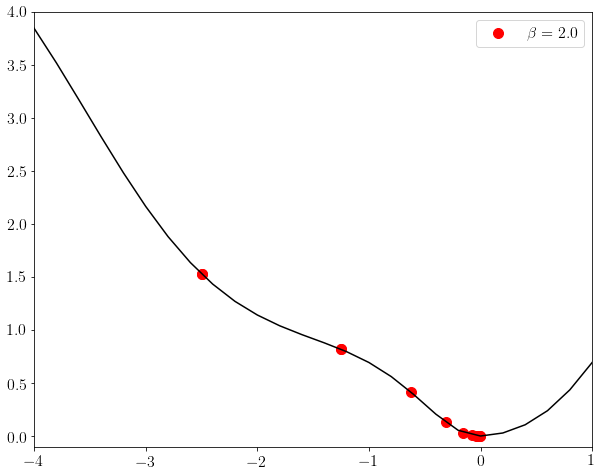

In [178]:
x = [] # list for the points
# First two points
x1 = -5.0
x2 = -2.5
x.append(nelder_mead(x1,x2,f))


plt.rc('font', family='arial')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
fig = plt.figure(figsize=(10,8))

# plot of the function
plt.plot(xaxis, f(xaxis), color = 'black')

# Plot of the points give by the Nelder Mead algorithm
plt.scatter(x[0], f(x[0]), color = 'r', s = 100)

          
for i in range(10):
    x.append(nelder_mead(x[i][0],x[i][1],f))
    
plt.scatter(list(zip(*x))[0], f(list(zip(*x))[0]), s = 100, color = 'r', label = R'$\beta = 2.0$')


plt.xlim(-4,1)
plt.ylim(-0.1,4)
plt.legend(fontsize = 16)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

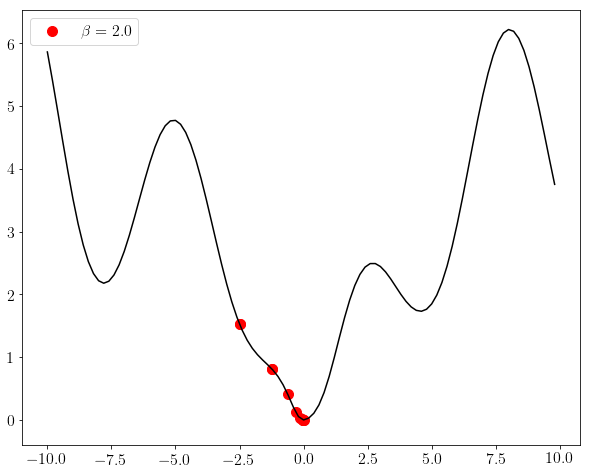

In [181]:
x = [] # list for the points
# First two points
x1 = -5.0
x2 = -2.5
x.append(nelder_mead(x1,x2,f))


plt.rc('font', family='arial')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
fig = plt.figure(figsize=(10,8))

# plot of the function
plt.plot(xaxis, f(xaxis), color = 'black')

# Plot of the points give by the Nelder Mead algorithm
plt.scatter(x[0], f(x[0]), color = 'r', s = 100)
          
for i in range(10):
    x.append(nelder_mead(x[i][0],x[i][1],f))
   
plt.scatter(list(zip(*x))[0], f(list(zip(*x))[0]), s = 100, color = 'r', label = R'$\beta = 2.0$')


plt.legend(fontsize = 16)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

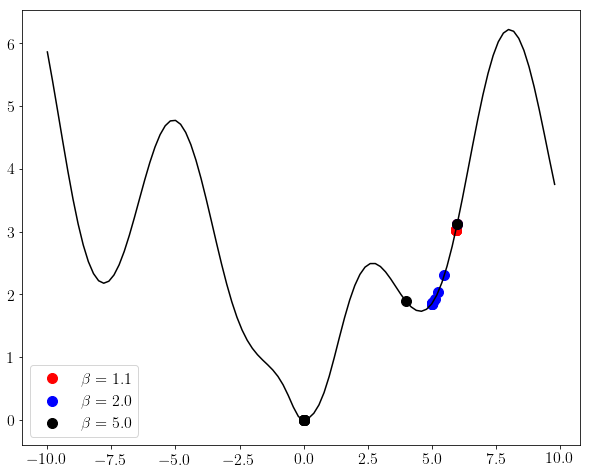

In [194]:
x = [] # list for the points
x_2 = []
x_3 = []
# First two points
x1 = 6.0
x2 = 7.0
x.append(nelder_mead(x1,x2,f, alpha = 1.0, beta = 1.1, gamma = 0.5, delta = 0.5))
x_2.append(nelder_mead(x1,x2,f, alpha = 1.0, beta = 2.0, gamma = 0.5, delta = 0.5))
x_3.append(nelder_mead(x1,x2,f, alpha = 1.0, beta = 5.0, gamma = 0.5, delta = 0.5))


plt.rc('font', family='arial')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
fig = plt.figure(figsize=(10,8))

# plot of the function
plt.plot(xaxis, f(xaxis), color = 'black')

# Plot of the points give by the Nelder Mead algorithm
plt.scatter(x[0], f(x[0]), color = 'r', s = 100)
          
for i in range(10):
    x.append(nelder_mead(x[i][0],x[i][1],f, alpha = 1.0, beta = 1.1, gamma = 0.5, delta = 0.5))    
    x_2.append(nelder_mead(x_2[i][0],x_2[i][1],f, alpha = 1.0, beta = 2.0, gamma = 0.5, delta = 0.5))
    x_3.append(nelder_mead(x_3[i][0],x_3[i][1],f, alpha = 1.0, beta = 5.0, gamma = 0.5, delta = 0.5))
    
    
plt.scatter(list(zip(*x))[0], f(list(zip(*x))[0]), s = 100, color = 'r', label = R'$\beta = 1.1$')
plt.scatter(list(zip(*x_2))[0], f(list(zip(*x_2))[0]), s = 100, color = 'b', label = R'$\beta = 2.0$')
plt.scatter(list(zip(*x_3))[0], f(list(zip(*x_3))[0]), s = 100, color = 'black', label = R'$\beta = 5.0$')
    
plt.legend(fontsize = 16)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);




## Visualisation demo

https://www.benfrederickson.com/numerical-optimization/

The obvious problem in this approach is using a fixed step size: it can't get closer to the true minima than the step size so it doesn't converge. It also spends too much time inching towards the minima when it's clear that the step size should be larger.

To overcome these problems, the Nelder-Mead method dynamically adjusts the step size based off the loss of the new point. If the new point is better than any previously seen value, it expands the step size to accelerate towards the bottom. Likewise if the new point is worse it contracts the step size to converge around the minima (from: Ben Frederiskcson)

# Gradient Descent

We take a function $F({\bf x})$ of a vector $\bf x$ is differentiable around a point $x_0$, $F({\bf x})$ descreases **fastest** in the direction of the gradient of F. So if we define a sequence

$$
{\bf a}_{n+1} = {\bf a}_n - \gamma \nabla F({\bf a_n})
$$

for $\gamma > 0$ small enough, then $F({\bf a_n}) \geq F({\bf a_{n+1}})$. Because we want to move in the direction of the minimum of the function of $F$.  So hopefully the sequence ${\bf a}_n$ will converge toward the minimum of the function $F$. How big or small you choose $\gamma$ will make the difference between converging, not doing anything or simply diverging.

$\gamma$ is called **learning rate**.

If you allow $\gamma$ to change at each iteration and choose it correctly, with some restrictions convergence is guaranteed.

Reference: https://en.wikipedia.org/wiki/Gradient_descent

Visulations of the algorithm (Reference: https://jed-ai.github.io/py1_gd_animation/)

![](fig1.png)

In [16]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="demo-b.mp4" type="video/mp4">
</video></div>

Reference: https://gist.github.com/thanasi/ad31f798b747629e717bcebd2cad15cf

## Exercise 1 (difficulty: easy)

given the function

$$
f(x)=3+x^3
$$

and its derivative

$$
\frac{df(x)}{dx} = 3x^2
$$

do the following

1. Evaluate the derivative at the point 5, 6 and 10
2. Plot the derivative function and the function together and interpret the two functions.

## Exercise 2 (difficulty: FUN)

Ignoring the conditions in which this is true, for a function $f(x)$ in one dimensions that are continous and differentiable in a specific rage one can find the location of the minimum or maximum solving the equation

$$
\frac{df(x)}{dx} = 0
$$

Given the function

$$
f(x) = 3x+x^2+2
$$

find numerically the minimum or maximum (and identify which one is) using the equation

$$
\frac{df(x)}{dx} = 3+2x = 0
$$



## Exercise 3 (difficulty: hard) - Gradient Descent

Consider again the function given in the previous exercise

$$
f(x) = 3x+x^2+2
$$

consider the following numerical series

$$
a_{n+1} = a_n - \gamma \frac{df(a_n)}{dx}
$$

Check numerically that, starting from a random value for $a_0$, the sequence $a_n$ converges to the minimum you found in the previous exercise. Check the method with several values of $\gamma$. What do you observe for big or small values? Can you compare the speed of convergence?

Try with the following values

$$\gamma = 0.001, 0.1, 1.0, 3.0$$

What do you observe?

**HINT**: 

$$
\frac{df(x)}{dx} = 3+2x
$$

If you want to read more on this method you can check here: https://en.wikipedia.org/wiki/Gradient_descent

### Solution 

In [197]:
def gd(an, gamma):
    return an-gamma*(3.0+2.0*an)

In [209]:
# Starting point
a0 = 2
gamma = 0.1

a = [a0]
n = 30 # number of iteration
# Loop
for i in range (1,n):
    a.append(gd(a[i-1],gamma))
    
print("Expected values is", -3.0/2.0)
print("Algorithm estimation after",n,"iterations is", a[-1])

Expected values is -1.5
Algorithm estimation after 30 iterations is -1.4945840123281267
